<a href="https://colab.research.google.com/github/JoseOrtega51/ValuationLibrary/blob/main/examples/Straddle_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Straddle strategy
First install the library:

In [ ]:
!git clone https://github.com/JoseOrtega51/ValuationLibrary.git
!cd ValuationLibrary/ && git checkout Stable
!apt-get update
!apt-get install -y build-essential
!pip install pybind11 setuptools
!cd ValuationLibrary/ && pip install .

Then, you can use it;

{'Option_PUT', 'Option_CALL'}


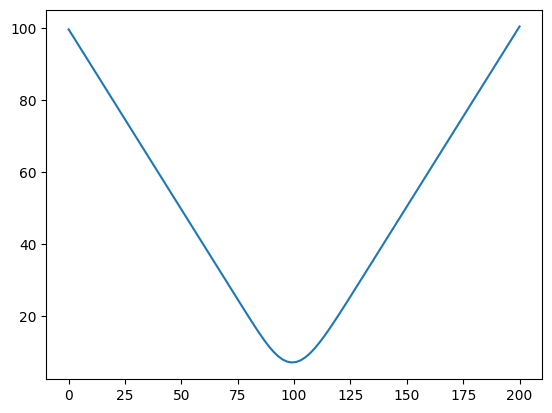

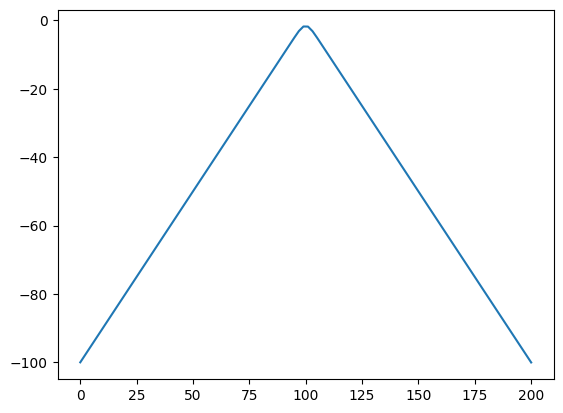

In [2]:
import ValuationLibrary as ValLry
import numpy as np
import matplotlib.pyplot as plt


#Define a strategy portfolio
Straddle = ValLry.portfolio()


################## CREATE STRADDLE ####################################

#Define a European Option
OpcionCall = ValLry.EuropeanOption(ValLry.OptionType.PUT,100., 1.)

#set the default model
OpcionCall.BSM.setup(0.2, 0.02)
OpcionCall.setPricingModel(ValLry.PricingModel.BLACK_SCHOLES)

#Add option to portfolio
Straddle.longInstrument("Option_PUT", OpcionCall)

#Define a European Option
OpcionCall = ValLry.EuropeanOption(ValLry.OptionType.CALL,100., 1.)

#set the default model
OpcionCall.BSM.setup(0.2, 0.02)
OpcionCall.setPricingModel(ValLry.PricingModel.BLACK_SCHOLES)

#Add option to portfolio
Straddle.longInstrument("Option_CALL", OpcionCall)

#get the list of instruments in the porfolio
portfolioList = Straddle.getLabelList()
print(portfolioList)

#####################################################################

# Price the straddle
S = np.linspace(0., 200., 100)
Value_straddle = Straddle.price(0.8,S)
plt.plot(S,Value_straddle)
plt.show()

# Create new big portfolio
book = ValLry.portfolio()

# Short the straddle in the new portfolio
book.shortInstrument("Stradle", Straddle)

S = np.linspace(0., 200., 100)
Value_book = book.price(0.99,S)
plt.plot(S,Value_book)
plt.show()
